# Generate the random data and save the normal and Base64 seperately

In [ ]:
import os
import csv
import random
import time
import json
import base64
from faker import Faker

fake = Faker()

def generate_user_information(num_users):
    user_info = {}
    for user_id in range(1, num_users + 1):
        user_info[user_id] = {
            'first_name': fake.first_name(),
            'last_name': fake.last_name(),
            'date_of_birth': fake.date_of_birth(minimum_age=18, maximum_age=80).strftime("%Y-%m-%d"),
            'gender': fake.random_element(elements=('Male', 'Female')),
            'address': fake.address(),
            'phone_number': fake.phone_number(),
            'email_address': fake.email()
        }
    return user_info

def generate_random_data(user_id, user_info):
    data_creation_time = time.time()
    current_time = time.strftime("%Y-%m-%d %H:%M:%S")

    patient_info = user_info[user_id]

    heart_rate = random.randint(60, 100)
    blood_pressure = f"{random.randint(90, 140)}/{random.randint(60, 90)}"
    respiration_rate = random.randint(12, 20)
    body_temperature = round(random.uniform(36.0, 37.5), 2)
    blood_glucose_levels = random.uniform(70, 140)
    electrocardiogram = "Sample ECG data"  
    body_weight = round(random.uniform(50, 100), 2)

    data = {'user_id': user_id, 'timestamp': current_time,
            'encryption_duration': 0, 'data_creation_time': data_creation_time,
            'file_size': 0, 'heart_rate': heart_rate,
            'blood_pressure': blood_pressure, 'respiration_rate': respiration_rate,
            'body_temperature': body_temperature, 'blood_glucose_levels': blood_glucose_levels,
            'electrocardiogram': electrocardiogram, 'body_weight': body_weight}

    data.update(patient_info)

    return data

def save_data_to_txt(data, folder_path_base64, folder_path_no_base64):
    if not os.path.exists(folder_path_base64):
        os.makedirs(folder_path_base64)

    if not os.path.exists(folder_path_no_base64):
        os.makedirs(folder_path_no_base64)

    timestamp = time.strftime("%Y%m%d%H%M%S")

    filename_base64 = f"user-{data['user_id']}-{timestamp}_base64.txt"
    file_path_base64 = os.path.join(folder_path_base64, filename_base64)
    with open(file_path_base64, mode='w') as file:
        encoded_data = base64.b64encode(json.dumps(data).encode('utf-8')).decode('utf-8')
        file.write(encoded_data)
    print(f"Data saved with Base64 encoding to: {file_path_base64}")

    filename_no_base64 = f"user-{data['user_id']}-{timestamp}_no_base64.txt"
    file_path_no_base64 = os.path.join(folder_path_no_base64, filename_no_base64)
    with open(file_path_no_base64, mode='w') as file:
        file.write(json.dumps(data))
    print(f"Data saved without Base64 encoding to: {file_path_no_base64}")

def save_to_final_report(final_report_path, data):
    fieldnames = ['user_id', 'timestamp', 'encryption_duration', 'file_size', 'data_creation_time',
                  'first_name', 'last_name', 'date_of_birth', 'gender', 'address',
                  'phone_number', 'email_address',
                  'heart_rate', 'blood_pressure', 'respiration_rate',
                  'body_temperature', 'blood_glucose_levels', 'electrocardiogram', 'body_weight']

    if os.path.isdir(final_report_path):
        final_report_path = os.path.join(final_report_path, "final_reportD7.csv")

    file_exists = os.path.exists(final_report_path)

    with open(final_report_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        if not file_exists:
            writer.writeheader()

        writer.writerow(data)

def simulate_iot_devices(num_users, folder_path_base64, folder_path_no_base64, final_report_path, duration_seconds):
    user_info = generate_user_information(num_users)

    start_time = time.time()
    end_time = start_time + duration_seconds

    while time.time() < end_time:
        for user_id in range(1, num_users + 1):
            data = generate_random_data(user_id, user_info)
            save_data_to_txt(data, folder_path_base64, folder_path_no_base64)
            save_to_final_report(final_report_path, data)

        interval_seconds = random.randint(1, 20)
        time.sleep(interval_seconds)

if __name__ == "__main__":
    num_users = int(input("Enter the number of users: "))
    folder_path_base64 = input("Enter the folder path to save data with Base64 encoding (txt files): ")
    folder_path_no_base64 = input("Enter the folder path to save data without Base64 encoding (txt files): ")
    final_report_path = input("Enter the path for the final report file or directory (csv): ")
    duration_seconds = 7200  # 2 Hour

    simulate_iot_devices(num_users, folder_path_base64, folder_path_no_base64, final_report_path, duration_seconds)


# Converthe data to Normal

In [20]:
import os
import base64

def correct_padding(data):
    """ Adds missing padding to the base64 encoded data """
    padding = 4 - (len(data) % 4)
    return data + ('=' * padding)

source_directory = 'C:/Users/ROHAN/IotSimulation/Base64'

destination_directory = 'C:/Users/ROHAN/IotSimulation/Base64DecTest'

if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

for filename in os.listdir(source_directory):
    if filename.endswith('.txt'): 
        source_file_path = os.path.join(source_directory, filename)

        with open(source_file_path, 'r') as file:
            base64_content = file.read()

        base64_content = correct_padding(base64_content)

        try:
            normal_content = base64.b64decode(base64_content)
        except Exception as e:
            print(f"Error decoding file {filename}: {e}")
            continue

        destination_file_path = os.path.join(destination_directory, filename)

        with open(destination_file_path, 'wb') as file:
            file.write(normal_content)

print("Conversion complete.")


Conversion complete.


# Include the random encryption code and concatination part

In [2]:
import os
import csv
import random
import time
import json
import base64
import secrets
from faker import Faker

fake = Faker()

def generate_user_information(num_users):
    user_info = {}
    for user_id in range(1, num_users + 1):
        user_info[user_id] = {
            'first_name': fake.first_name(),
            'last_name': fake.last_name(),
            'date_of_birth': fake.date_of_birth(minimum_age=18, maximum_age=80).strftime("%Y-%m-%d"),
            'gender': fake.random_element(elements=('Male', 'Female')),
            'address': fake.address(),
            'phone_number': fake.phone_number(),
            'email_address': fake.email()
        }
    return user_info

def generate_random_data(user_id, user_info):
    data_creation_time = time.time()
    current_time = time.strftime("%Y-%m-%d %H:%M:%S")

    patient_info = user_info[user_id]

    heart_rate = random.randint(60, 100)
    blood_pressure = f"{random.randint(90, 140)}/{random.randint(60, 90)}"
    respiration_rate = random.randint(12, 20)
    body_temperature = round(random.uniform(36.0, 37.5), 2)
    blood_glucose_levels = random.uniform(70, 140)
    electrocardiogram = "Sample ECG data"
    body_weight = round(random.uniform(50, 100), 2)

    data = {'user_id': user_id, 'timestamp': current_time,
            'encryption_duration': 0, 'data_creation_time': data_creation_time,
            'file_size': 0, 'heart_rate': heart_rate,
            'blood_pressure': blood_pressure, 'respiration_rate': respiration_rate,
            'body_temperature': body_temperature, 'blood_glucose_levels': blood_glucose_levels,
            'electrocardiogram': electrocardiogram, 'body_weight': body_weight}

    data.update(patient_info)

    return data

def generate_random_key():
    return secrets.token_hex(16)

def random_encryption(user_data):
    random_key = generate_random_key()
    R1, R2 = random_key[:len(random_key)//2], random_key[len(random_key)//2:]
    CTDevId_Uid = f"Encrypted({json.dumps(user_data)})"
    return R1, R2, CTDevId_Uid

def concatenating_random_number(R1, CTDevId_Uid, R2):
    return f"{R1}||{CTDevId_Uid}||{R2}"

def save_data_to_txt(data, folder_path_base64, folder_path_no_base64):
    if not os.path.exists(folder_path_base64):
        os.makedirs(folder_path_base64)
    if not os.path.exists(folder_path_no_base64):
        os.makedirs(folder_path_no_base64)

    timestamp = data['timestamp'].replace(':', '_')
    iot_dev_id = data['user_id']

    start_enc_time = time.perf_counter()  # Use perf_counter for better precision
    R1, R2, CTDevId_Uid = random_encryption(data)
    CT_prime = concatenating_random_number(R1, CTDevId_Uid, R2)
    end_enc_time = time.perf_counter()

    encryption_duration = end_enc_time - start_enc_time
    data['encryption_duration'] = encryption_duration  # Now captures very small durations

    filename_base64 = f"user-{iot_dev_id}-{timestamp}_base64.txt"
    file_path_base64 = os.path.join(folder_path_base64, filename_base64)
    with open(file_path_base64, mode='w') as file:
        encoded_data = base64.b64encode(CT_prime.encode('utf-8')).decode('utf-8')
        file.write(encoded_data)

    file_size = os.path.getsize(file_path_base64)
    data['file_size'] = file_size

    print(f"Data saved with Base64 encoding to: {file_path_base64}")

    filename_no_base64 = f"user-{iot_dev_id}-{timestamp}_no_base64.txt"
    file_path_no_base64 = os.path.join(folder_path_no_base64, filename_no_base64)
    with open(file_path_no_base64, mode='w') as file:
        file.write(json.dumps(data))
    print(f"Data saved without Base64 encoding to: {file_path_no_base64}")

def save_to_final_report(final_report_path, data):
    fieldnames = ['user_id', 'timestamp', 'encryption_duration', 'file_size', 'data_creation_time',
                  'first_name', 'last_name', 'date_of_birth', 'gender', 'address',
                  'phone_number', 'email_address', 'heart_rate', 'blood_pressure', 
                  'respiration_rate', 'body_temperature', 'blood_glucose_levels', 
                  'electrocardiogram', 'body_weight']

    if os.path.isdir(final_report_path):
        final_report_path = os.path.join(final_report_path, "final_report.csv")

    file_exists = os.path.exists(final_report_path)

    with open(final_report_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        if not file_exists:
            writer.writeheader()

        writer.writerow(data)

def simulate_iot_devices(num_users, folder_path_base64, folder_path_no_base64, final_report_path, duration_seconds):
    user_info = generate_user_information(num_users)

    start_time = time.time()
    end_time = start_time + duration_seconds

    while time.time() < end_time:
        for user_id in range(1, num_users + 1):
            data = generate_random_data(user_id, user_info)
            data['timestamp'] = data['timestamp'].replace(':', '_')
            save_data_to_txt(data, folder_path_base64, folder_path_no_base64)
            save_to_final_report(final_report_path, data)

            interval_seconds = random.randint(1, 20)
            time.sleep(interval_seconds)

if __name__ == "__main__":
    num_users = int(input("Enter the number of users: "))
    folder_path_base64 = input("Enter the folder path to save data with Base64 encoding (txt files): ")
    folder_path_no_base64 = input("Enter the folder path to save data without Base64 encoding (txt files): ")
    final_report_path = input("Enter the path for the final report file or directory (csv): ")
    duration_seconds = 600  # 2 hour

    simulate_iot_devices(num_users, folder_path_base64, folder_path_no_base64, final_report_path, duration_seconds)


Enter the number of users: 200
Enter the folder path to save data with Base64 encoding (txt files): C:/Users/ROHAN/IotSimulation/twoHour/base64
Enter the folder path to save data without Base64 encoding (txt files): C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest
Enter the path for the final report file or directory (csv): C:/Users/ROHAN/IotSimulation/twoHour
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-1-2024-01-13 13_31_24_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-1-2024-01-13 13_31_24_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-2-2024-01-13 13_31_39_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-2-2024-01-13 13_31_39_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-3-2024-01-13 13_31_50_base64.txt
Data saved without 

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-33-2024-01-13 13_38_04_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-33-2024-01-13 13_38_04_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-34-2024-01-13 13_38_18_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-34-2024-01-13 13_38_18_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-35-2024-01-13 13_38_24_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-35-2024-01-13 13_38_24_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-36-2024-01-13 13_38_35_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-36-2024-01-13 13_38_35_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-66-2024-01-13 13_43_26_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-66-2024-01-13 13_43_26_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-67-2024-01-13 13_43_34_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-67-2024-01-13 13_43_34_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-68-2024-01-13 13_43_41_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-68-2024-01-13 13_43_41_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-69-2024-01-13 13_43_44_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-69-2024-01-13 13_43_44_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-99-2024-01-13 13_48_48_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-99-2024-01-13 13_48_48_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-100-2024-01-13 13_48_50_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-100-2024-01-13 13_48_50_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-101-2024-01-13 13_49_08_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-101-2024-01-13 13_49_08_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-102-2024-01-13 13_49_09_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-102-2024-01-13 13_49_09_no_b

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-132-2024-01-13 13_55_20_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-132-2024-01-13 13_55_20_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-133-2024-01-13 13_55_38_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-133-2024-01-13 13_55_38_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-134-2024-01-13 13_55_57_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-134-2024-01-13 13_55_57_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-135-2024-01-13 13_56_02_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-135-2024-01-13 13_56_02_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-165-2024-01-13 14_01_30_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-165-2024-01-13 14_01_30_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-166-2024-01-13 14_01_42_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-166-2024-01-13 14_01_42_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-167-2024-01-13 14_01_57_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-167-2024-01-13 14_01_57_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-168-2024-01-13 14_02_13_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-168-2024-01-13 14_02_13_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-198-2024-01-13 14_06_49_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-198-2024-01-13 14_06_49_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-199-2024-01-13 14_07_08_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-199-2024-01-13 14_07_08_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-200-2024-01-13 14_07_24_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-200-2024-01-13 14_07_24_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-1-2024-01-13 14_07_41_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-1-2024-01-13 14_07_41_no_bas

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-31-2024-01-13 14_12_55_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-31-2024-01-13 14_12_55_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-32-2024-01-13 14_12_57_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-32-2024-01-13 14_12_57_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-33-2024-01-13 14_13_15_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-33-2024-01-13 14_13_15_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-34-2024-01-13 14_13_25_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-34-2024-01-13 14_13_25_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-64-2024-01-13 14_18_49_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-64-2024-01-13 14_18_49_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-65-2024-01-13 14_19_05_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-65-2024-01-13 14_19_05_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-66-2024-01-13 14_19_17_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-66-2024-01-13 14_19_17_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-67-2024-01-13 14_19_18_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-67-2024-01-13 14_19_18_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-97-2024-01-13 14_24_37_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-97-2024-01-13 14_24_37_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-98-2024-01-13 14_24_53_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-98-2024-01-13 14_24_53_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-99-2024-01-13 14_25_11_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-99-2024-01-13 14_25_11_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-100-2024-01-13 14_25_26_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-100-2024-01-13 14_25_26_no_base6

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-130-2024-01-13 14_30_26_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-130-2024-01-13 14_30_26_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-131-2024-01-13 14_30_40_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-131-2024-01-13 14_30_40_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-132-2024-01-13 14_30_59_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-132-2024-01-13 14_30_59_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-133-2024-01-13 14_31_00_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-133-2024-01-13 14_31_00_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-163-2024-01-13 14_36_05_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-163-2024-01-13 14_36_05_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-164-2024-01-13 14_36_19_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-164-2024-01-13 14_36_19_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-165-2024-01-13 14_36_23_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-165-2024-01-13 14_36_23_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-166-2024-01-13 14_36_27_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-166-2024-01-13 14_36_27_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-196-2024-01-13 14_41_47_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-196-2024-01-13 14_41_47_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-197-2024-01-13 14_41_54_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-197-2024-01-13 14_41_54_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-198-2024-01-13 14_42_08_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-198-2024-01-13 14_42_08_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-199-2024-01-13 14_42_23_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-199-2024-01-13 14_42_23_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-29-2024-01-13 14_47_12_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-29-2024-01-13 14_47_12_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-30-2024-01-13 14_47_18_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-30-2024-01-13 14_47_18_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-31-2024-01-13 14_47_26_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-31-2024-01-13 14_47_26_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-32-2024-01-13 14_47_42_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-32-2024-01-13 14_47_42_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-62-2024-01-13 14_53_37_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-62-2024-01-13 14_53_37_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-63-2024-01-13 14_53_40_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-63-2024-01-13 14_53_40_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-64-2024-01-13 14_53_47_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-64-2024-01-13 14_53_47_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-65-2024-01-13 14_54_04_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-65-2024-01-13 14_54_04_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-95-2024-01-13 14_58_58_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-95-2024-01-13 14_58_58_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-96-2024-01-13 14_59_07_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-96-2024-01-13 14_59_07_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-97-2024-01-13 14_59_11_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-97-2024-01-13 14_59_11_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-98-2024-01-13 14_59_13_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-98-2024-01-13 14_59_13_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-128-2024-01-13 15_04_18_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-128-2024-01-13 15_04_18_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-129-2024-01-13 15_04_22_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-129-2024-01-13 15_04_22_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-130-2024-01-13 15_04_41_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-130-2024-01-13 15_04_41_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-131-2024-01-13 15_05_00_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-131-2024-01-13 15_05_00_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-161-2024-01-13 15_09_41_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-161-2024-01-13 15_09_41_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-162-2024-01-13 15_09_53_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-162-2024-01-13 15_09_53_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-163-2024-01-13 15_10_08_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-163-2024-01-13 15_10_08_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-164-2024-01-13 15_10_24_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-164-2024-01-13 15_10_24_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-194-2024-01-13 15_16_07_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-194-2024-01-13 15_16_07_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-195-2024-01-13 15_16_13_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-195-2024-01-13 15_16_13_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-196-2024-01-13 15_16_23_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-196-2024-01-13 15_16_23_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-197-2024-01-13 15_16_27_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-197-2024-01-13 15_16_27_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-27-2024-01-13 15_20_56_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-27-2024-01-13 15_20_56_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-28-2024-01-13 15_21_04_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-28-2024-01-13 15_21_04_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-29-2024-01-13 15_21_20_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-29-2024-01-13 15_21_20_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-30-2024-01-13 15_21_21_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-30-2024-01-13 15_21_21_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-60-2024-01-13 15_26_54_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-60-2024-01-13 15_26_54_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-61-2024-01-13 15_27_08_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-61-2024-01-13 15_27_08_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-62-2024-01-13 15_27_23_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-62-2024-01-13 15_27_23_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-63-2024-01-13 15_27_30_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-63-2024-01-13 15_27_30_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-93-2024-01-13 15_33_01_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-93-2024-01-13 15_33_01_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-94-2024-01-13 15_33_04_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-94-2024-01-13 15_33_04_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-95-2024-01-13 15_33_09_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-95-2024-01-13 15_33_09_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-96-2024-01-13 15_33_25_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-96-2024-01-13 15_33_25_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-126-2024-01-13 15_38_49_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-126-2024-01-13 15_38_49_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-127-2024-01-13 15_38_58_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-127-2024-01-13 15_38_58_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-128-2024-01-13 15_39_13_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-128-2024-01-13 15_39_13_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-129-2024-01-13 15_39_20_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-129-2024-01-13 15_39_20_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-159-2024-01-13 15_44_27_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-159-2024-01-13 15_44_27_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-160-2024-01-13 15_44_42_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-160-2024-01-13 15_44_42_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-161-2024-01-13 15_44_52_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-161-2024-01-13 15_44_52_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-162-2024-01-13 15_45_06_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-162-2024-01-13 15_45_06_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-192-2024-01-13 15_50_36_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-192-2024-01-13 15_50_36_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-193-2024-01-13 15_50_44_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-193-2024-01-13 15_50_44_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-194-2024-01-13 15_50_48_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-194-2024-01-13 15_50_48_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-195-2024-01-13 15_51_02_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-195-2024-01-13 15_51_02_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-25-2024-01-13 15_56_02_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-25-2024-01-13 15_56_02_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-26-2024-01-13 15_56_13_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-26-2024-01-13 15_56_13_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-27-2024-01-13 15_56_14_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-27-2024-01-13 15_56_14_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-28-2024-01-13 15_56_20_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-28-2024-01-13 15_56_20_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-58-2024-01-13 16_01_27_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-58-2024-01-13 16_01_27_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-59-2024-01-13 16_01_35_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-59-2024-01-13 16_01_35_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-60-2024-01-13 16_01_40_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-60-2024-01-13 16_01_40_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-61-2024-01-13 16_01_50_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-61-2024-01-13 16_01_50_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-91-2024-01-13 16_07_00_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-91-2024-01-13 16_07_00_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-92-2024-01-13 16_07_05_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-92-2024-01-13 16_07_05_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-93-2024-01-13 16_07_17_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-93-2024-01-13 16_07_17_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-94-2024-01-13 16_07_27_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-94-2024-01-13 16_07_27_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-124-2024-01-13 16_13_14_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-124-2024-01-13 16_13_14_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-125-2024-01-13 16_13_34_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-125-2024-01-13 16_13_34_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-126-2024-01-13 16_13_40_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-126-2024-01-13 16_13_40_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-127-2024-01-13 16_13_55_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-127-2024-01-13 16_13_55_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-157-2024-01-13 16_19_18_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-157-2024-01-13 16_19_18_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-158-2024-01-13 16_19_29_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-158-2024-01-13 16_19_29_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-159-2024-01-13 16_19_49_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-159-2024-01-13 16_19_49_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-160-2024-01-13 16_19_54_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-160-2024-01-13 16_19_54_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-190-2024-01-13 16_25_06_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-190-2024-01-13 16_25_06_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-191-2024-01-13 16_25_16_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-191-2024-01-13 16_25_16_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-192-2024-01-13 16_25_34_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-192-2024-01-13 16_25_34_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-193-2024-01-13 16_25_41_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-193-2024-01-13 16_25_41_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-23-2024-01-13 16_31_02_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-23-2024-01-13 16_31_02_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-24-2024-01-13 16_31_21_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-24-2024-01-13 16_31_21_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-25-2024-01-13 16_31_29_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-25-2024-01-13 16_31_29_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-26-2024-01-13 16_31_31_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-26-2024-01-13 16_31_31_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-56-2024-01-13 16_37_21_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-56-2024-01-13 16_37_21_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-57-2024-01-13 16_37_30_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-57-2024-01-13 16_37_30_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-58-2024-01-13 16_37_40_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-58-2024-01-13 16_37_40_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-59-2024-01-13 16_37_58_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-59-2024-01-13 16_37_58_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-89-2024-01-13 16_42_21_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-89-2024-01-13 16_42_21_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-90-2024-01-13 16_42_23_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-90-2024-01-13 16_42_23_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-91-2024-01-13 16_42_24_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-91-2024-01-13 16_42_24_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-92-2024-01-13 16_42_25_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-92-2024-01-13 16_42_25_no_base64.

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-122-2024-01-13 16_48_10_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-122-2024-01-13 16_48_10_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-123-2024-01-13 16_48_28_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-123-2024-01-13 16_48_28_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-124-2024-01-13 16_48_38_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-124-2024-01-13 16_48_38_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-125-2024-01-13 16_48_52_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-125-2024-01-13 16_48_52_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-155-2024-01-13 16_53_46_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-155-2024-01-13 16_53_46_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-156-2024-01-13 16_53_58_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-156-2024-01-13 16_53_58_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-157-2024-01-13 16_54_00_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-157-2024-01-13 16_54_00_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-158-2024-01-13 16_54_19_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-158-2024-01-13 16_54_19_no

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-188-2024-01-13 16_59_59_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-188-2024-01-13 16_59_59_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-189-2024-01-13 17_00_17_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-189-2024-01-13 17_00_17_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-190-2024-01-13 17_00_36_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-190-2024-01-13 17_00_36_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/base64\user-191-2024-01-13 17_00_38_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest\user-191-2024-01-13 17_00_38_no

# Convert the random enc to normal file

In [3]:
import os
import base64
import json

def decrypt_ct_prime(ct_prime):
    R1, encrypted_data, R2 = ct_prime.split('||')

    json_data = encrypted_data[len("Encrypted("):-1]
    
    decrypted_data = json.loads(json_data)

    return decrypted_data

def read_and_decrypt_files(folder_path_base64, folder_path_decrypted):
    if not os.path.exists(folder_path_decrypted):
        os.makedirs(folder_path_decrypted)

    for filename in os.listdir(folder_path_base64):
        if filename.endswith('_base64.txt'):
            file_path = os.path.join(folder_path_base64, filename)

            with open(file_path, 'r') as file:
                encoded_data = file.read()
                padded_encoded_data = encoded_data + '==='
                try:
                    decoded_data = base64.b64decode(padded_encoded_data).decode('utf-8')
                    decrypted_info = decrypt_ct_prime(decoded_data)

                    decrypted_filename = f"decrypted_{filename.replace('_base64.txt', '.txt')}"
                    decrypted_file_path = os.path.join(folder_path_decrypted, decrypted_filename)
                    with open(decrypted_file_path, 'w') as decrypted_file:
                        decrypted_file.write(json.dumps(decrypted_info, indent=4))
                except Exception as e:
                    print(f"Error decoding file {filename}: {e}")

def main():
    folder_path_base64 = input("Enter the folder path containing Base64 encoded files for decryption: ")
    folder_path_decrypted = input("Enter the folder path to save decrypted data: ")
    read_and_decrypt_files(folder_path_base64, folder_path_decrypted)
    print(f"Decrypted files saved in {folder_path_decrypted}")

if __name__ == "__main__":
    main()


Enter the folder path containing Base64 encoded files for decryption: C:/Users/ROHAN/IotSimulation/Base64
Enter the folder path to save decrypted data: C:/Users/ROHAN/IotSimulation/Base64DecTest
Decrypted files saved in C:/Users/ROHAN/IotSimulation/Base64DecTest


In [ ]:
C:/Users/ROHAN/IotSimulation/Base64

In [ ]:
C:/Users/ROHAN/IotSimulation/Base64DecTest

# Plot

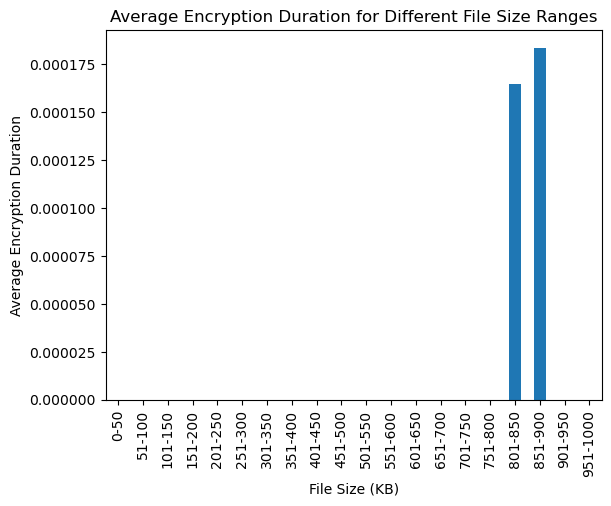

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = "C:/Users/ROHAN/IotSimulation/final_report.csv"
data = pd.read_csv(filePath)

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '601-650', '651-700', '701-750', '751-800', '801-850', '851-900', '901-950', '951-1000']

data['file_size_bin'] = pd.cut(data['file_size'], bins=bins, labels=bin_labels, right=False)
avg_encryption_time = data.groupby('file_size_bin')['encryption_duration'].mean()
avg_encryption_time.plot(kind='bar')

plt.xlabel('File Size (KB)')
plt.ylabel('Average Encryption Duration')
plt.title('Average Encryption Duration for Different File Size Ranges')
plt.show()


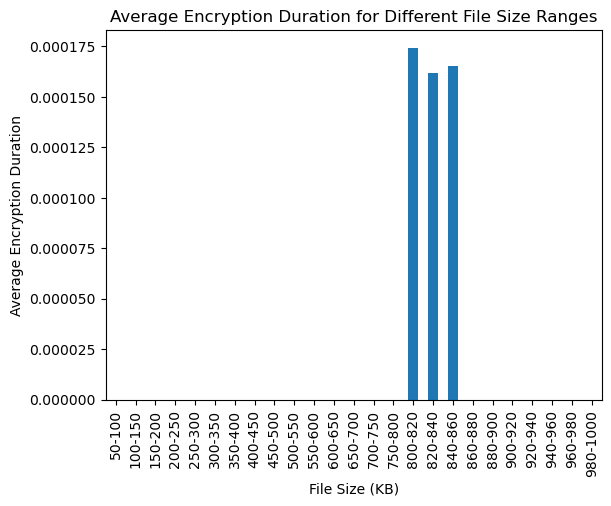

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = "C:/Users/ROHAN/IotSimulation/final_report.csv"

data = pd.read_csv(filePath)
initial_bins = list(range(50, 850, 50))

finer_bins = list(range(800, 1020, 20))

bins = initial_bins + finer_bins[1:]  

initial_bin_labels = [f'{i}-{i+50}' for i in range(50, 800, 50)]

finer_bin_labels = [f'{i}-{i+20}' for i in range(800, 1000, 20)]

bin_labels = initial_bin_labels + finer_bin_labels

data['file_size_bin'] = pd.cut(data['file_size'], bins=bins, labels=bin_labels, right=False)

avg_encryption_time = data.groupby('file_size_bin')['encryption_duration'].mean()

avg_encryption_time.plot(kind='bar')
plt.xlabel('File Size (KB)')
plt.ylabel('Average Encryption Duration')
plt.title('Average Encryption Duration for Different File Size Ranges')
plt.show()


In [1]:
import os
import csv
import random
import time
import json
import base64
import secrets
from faker import Faker

# DataUser dictionary
DataUser = {
    'Doctor1': 'EMP001', 'Nurse1': 'EMP002', 'Surgeon1': 'EMP003', 'Therapist1': 'EMP004',
    'Pharmacist1': 'EMP005', 'Radiologist1': 'EMP006', 'Pathologist1': 'EMP007',
    'Nurse2': 'EMP008', 'Doctor2': 'EMP009', 'Surgeon2': 'EMP010', 'Therapist2': 'EMP011',
    'Pharmacist2': 'EMP012', 'Radiologist2': 'EMP013', 'Pathologist2': 'EMP014',
    'Nurse3': 'EMP015', 'Doctor3': 'EMP016', 'Surgeon3': 'EMP017', 'Therapist3': 'EMP018',
    'Pharmacist3': 'EMP019', 'Radiologist3': 'EMP020'
}

fake = Faker()

def generate_user_information(num_users):
    user_info = {}
    for user_id in range(1, num_users + 1):
        # Assigning fixed authorized_data_users for each user
        authorized_users = random.sample(list(DataUser.values()), random.randint(2, 3))

        user_info[user_id] = {
            'first_name': fake.first_name(),
            'last_name': fake.last_name(),
            'date_of_birth': fake.date_of_birth(minimum_age=18, maximum_age=80).strftime("%Y-%m-%d"),
            'gender': fake.random_element(elements=('Male', 'Female')),
            'address': fake.address(),
            'phone_number': fake.phone_number(),
            'email_address': fake.email(),
            'authorized_data_users': authorized_users  # Added here
        }
    return user_info

def generate_random_data(user_id, user_info):
    data_creation_time = time.time()
    current_time = time.strftime("%Y-%m-%d %H:%M:%S")

    patient_info = user_info[user_id]

    heart_rate = random.randint(60, 100)
    blood_pressure = f"{random.randint(90, 140)}/{random.randint(60, 90)}"
    respiration_rate = random.randint(12, 20)
    body_temperature = round(random.uniform(36.0, 37.5), 2)
    blood_glucose_levels = random.uniform(70, 140)
    electrocardiogram = "Sample ECG data"
    body_weight = round(random.uniform(50, 100), 2)

    # Use the fixed authorized_data_users for this user
    authorized_users = user_info[user_id]['authorized_data_users']

    data = {
        'user_id': user_id, 'timestamp': current_time,
        'encryption_duration': 0, 'data_creation_time': data_creation_time,
        'file_size': 0, 'heart_rate': heart_rate,
        'blood_pressure': blood_pressure, 'respiration_rate': respiration_rate,
        'body_temperature': body_temperature, 'blood_glucose_levels': blood_glucose_levels,
        'electrocardiogram': electrocardiogram, 'body_weight': body_weight,
        'authorized_data_users': authorized_users
    }

    data.update(patient_info)
    return data

def generate_random_key():
    return secrets.token_hex(16)

def random_encryption(user_data):
    random_key = generate_random_key()
    R1, R2 = random_key[:len(random_key)//2], random_key[len(random_key)//2:]
    CTDevId_Uid = f"Encrypted({json.dumps(user_data)})"
    return R1, R2, CTDevId_Uid

def concatenating_random_number(R1, CTDevId_Uid, R2):
    return f"{R1}||{CTDevId_Uid}||{R2}"

def save_data_to_txt(data, folder_path_base64, folder_path_no_base64):
    if not os.path.exists(folder_path_base64):
        os.makedirs(folder_path_base64)
    if not os.path.exists(folder_path_no_base64):
        os.makedirs(folder_path_no_base64)

    timestamp = data['timestamp'].replace(':', '_')
    iot_dev_id = data['user_id']

    start_enc_time = time.perf_counter()  # Use perf_counter for better precision
    R1, R2, CTDevId_Uid = random_encryption(data)
    CT_prime = concatenating_random_number(R1, CTDevId_Uid, R2)  # Corrected line
    end_enc_time = time.perf_counter()

    encryption_duration = end_enc_time - start_enc_time
    data['encryption_duration'] = encryption_duration  # Now captures very small durations

    filename_base64 = f"user-{iot_dev_id}-{timestamp}_base64.txt"
    file_path_base64 = os.path.join(folder_path_base64, filename_base64)
    with open(file_path_base64, mode='w') as file:
        encoded_data = base64.b64encode(CT_prime.encode('utf-8')).decode('utf-8')
        file.write(encoded_data)

    file_size = os.path.getsize(file_path_base64)
    data['file_size'] = file_size

    print(f"Data saved with Base64 encoding to: {file_path_base64}")

    filename_no_base64 = f"user-{iot_dev_id}-{timestamp}_no_base64.txt"
    file_path_no_base64 = os.path.join(folder_path_no_base64, filename_no_base64)
    with open(file_path_no_base64, mode='w') as file:
        file.write(json.dumps(data))
    print(f"Data saved without Base64 encoding to: {file_path_no_base64}")

def save_to_final_report(final_report_path, data):
    fieldnames = ['user_id', 'timestamp', 'encryption_duration', 'file_size', 'data_creation_time',
                  'first_name', 'last_name', 'date_of_birth', 'gender', 'address',
                  'phone_number', 'email_address', 'heart_rate', 'blood_pressure', 
                  'respiration_rate', 'body_temperature', 'blood_glucose_levels', 
                  'electrocardiogram', 'body_weight', 'authorized_data_users']

    if os.path.isdir(final_report_path):
        final_report_path = os.path.join(final_report_path, "final_report.csv")

    file_exists = os.path.exists(final_report_path)

    with open(final_report_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        if not file_exists:
            writer.writeheader()

        writer.writerow(data)

def simulate_iot_devices(num_users, folder_path_base64, folder_path_no_base64, final_report_path, duration_seconds):
    user_info = generate_user_information(num_users)

    start_time = time.time()
    end_time = start_time + duration_seconds

    while time.time() < end_time:
        for user_id in range(1, num_users + 1):
            data = generate_random_data(user_id, user_info)
            data['timestamp'] = data['timestamp'].replace(':', '_')
            save_data_to_txt(data, folder_path_base64, folder_path_no_base64)
            save_to_final_report(final_report_path, data)

            interval_seconds = random.randint(1, 20)
            time.sleep(interval_seconds)

if __name__ == "__main__":
    num_users = int(input("Enter the number of users: "))
    folder_path_base64 = input("Enter the folder path to save data with Base64 encoding (txt files): ")
    folder_path_no_base64 = input("Enter the folder path to save data without Base64 encoding (txt files): ")
    final_report_path = input("Enter the path for the final report file or directory (csv): ")
    duration_seconds = 600  # 2hour

    simulate_iot_devices(num_users, folder_path_base64, folder_path_no_base64, final_report_path, duration_seconds)


Enter the number of users: 20
Enter the folder path to save data with Base64 encoding (txt files): C:/Users/ROHAN/IotSimulation/Base64
Enter the folder path to save data without Base64 encoding (txt files): C:/Users/ROHAN/IotSimulation/NoBase64
Enter the path for the final report file or directory (csv): C:/Users/ROHAN/IotSimulation
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-1-2024-02-15 12_30_38_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-1-2024-02-15 12_30_38_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-2-2024-02-15 12_30_56_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-2-2024-02-15 12_30_56_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-3-2024-02-15 12_31_11_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-3-2024-02-15 12_3

Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-16-2024-02-15 12_37_36_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-16-2024-02-15 12_37_36_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-17-2024-02-15 12_37_38_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-17-2024-02-15 12_37_38_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-18-2024-02-15 12_37_41_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-18-2024-02-15 12_37_41_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-19-2024-02-15 12_38_01_base64.txt
Data saved without Base64 encoding to: C:/Users/ROHAN/IotSimulation/NoBase64\user-19-2024-02-15 12_38_01_no_base64.txt
Data saved with Base64 encoding to: C:/Users/ROHAN/IotSimulation/Base64\user-20-

In [ ]:
C:/Users/ROHAN/IotSimulation/Base64

In [ ]:
C:/Users/ROHAN/IotSimulation/NoBase64

In [ ]:
C:/Users/ROHAN/IotSimulation/twoHour/Base64DecTest

In [ ]:
C:/Users/ROHAN/IotSimulation/twoHour/base64

# IoT simulation without random Enc For Conference

In [ ]:
DataUser = {
    'Doctor1': 'EMP001', 'Nurse1': 'EMP002', 'Surgeon1': 'EMP003', 'Therapist1': 'EMP004',
    'Pharmacist1': 'EMP005', 'Radiologist1': 'EMP006', 'Pathologist1': 'EMP007',
    'Nurse2': 'EMP008', 'Doctor2': 'EMP009', 'Surgeon2': 'EMP010', 'Therapist2': 'EMP011',
    'Pharmacist2': 'EMP012', 'Radiologist2': 'EMP013', 'Pathologist2': 'EMP014',
    'Nurse3': 'EMP015', 'Doctor3': 'EMP016', 'Surgeon3': 'EMP017', 'Therapist3': 'EMP018',
    'Pharmacist3': 'EMP019', 'Radiologist3': 'EMP020', 'Doctor4': 'EMP021',
    'Nurse4': 'EMP022', 'Surgeon4': 'EMP023', 'Therapist4': 'EMP024', 'Pharmacist4': 'EMP025',
    'Radiologist4': 'EMP026', 'Pathologist4': 'EMP027', 'Doctor5': 'EMP028',
    'Nurse5': 'EMP029', 'Surgeon5': 'EMP030', 'Therapist5': 'EMP031', 'Pharmacist5': 'EMP032',
    'Radiologist5': 'EMP033', 'Pathologist5': 'EMP034', 'Doctor6': 'EMP035',
    'Nurse6': 'EMP036', 'Surgeon6': 'EMP037', 'Therapist6': 'EMP038', 'Pharmacist6': 'EMP039',
    'Radiologist6': 'EMP040', 'Pathologist6': 'EMP041', 'Doctor7': 'EMP042',
    'Nurse7': 'EMP043', 'Surgeon7': 'EMP044', 'Therapist7': 'EMP045', 'Pharmacist7': 'EMP046',
    'Radiologist7': 'EMP047', 'Pathologist7': 'EMP048', 'Doctor8': 'EMP049',
    'Nurse8': 'EMP050', 'Surgeon8': 'EMP051', 'Therapist8': 'EMP052', 'Pharmacist8': 'EMP053',
    'Radiologist8': 'EMP054', 'Pathologist8': 'EMP055', 'Doctor9': 'EMP056',
    'Nurse9': 'EMP057', 'Surgeon9': 'EMP058', 'Therapist9': 'EMP059', 'Pharmacist9': 'EMP060',
    'Radiologist9': 'EMP061', 'Pathologist9': 'EMP062', 'Doctor10': 'EMP063',
    'Nurse10': 'EMP064', 'Surgeon10': 'EMP065', 'Therapist10': 'EMP066', 'Pharmacist10': 'EMP067',
    'Radiologist10': 'EMP068', 'Pathologist10': 'EMP069', 'Doctor11': 'EMP070',
    'Nurse11': 'EMP071', 'Surgeon11': 'EMP072', 'Therapist11': 'EMP073', 'Pharmacist11': 'EMP074',
    'Radiologist11': 'EMP075', 'Pathologist11': 'EMP076', 'Doctor12': 'EMP077',
    'Nurse12': 'EMP078', 'Surgeon12': 'EMP079', 'Therapist12': 'EMP080', 'Pharmacist12': 'EMP081',
    'Radiologist12': 'EMP082', 'Pathologist12': 'EMP083'
}


In [1]:
import os
import json
import csv
import random
import time
from faker import Faker

# DataUser dictionary
DataUser = {
    'Doctor1': 'EMP001', 'Nurse1': 'EMP002', 'Surgeon1': 'EMP003', 'Therapist1': 'EMP004',
    'Pharmacist1': 'EMP005', 'Radiologist1': 'EMP006', 'Pathologist1': 'EMP007',
    'Nurse2': 'EMP008', 'Doctor2': 'EMP009', 'Surgeon2': 'EMP010', 'Therapist2': 'EMP011',
    'Pharmacist2': 'EMP012', 'Radiologist2': 'EMP013', 'Pathologist2': 'EMP014',
    'Nurse3': 'EMP015', 'Doctor3': 'EMP016', 'Surgeon3': 'EMP017', 'Therapist3': 'EMP018',
    'Pharmacist3': 'EMP019', 'Radiologist3': 'EMP020', 'Doctor4': 'EMP021',
    'Nurse4': 'EMP022', 'Surgeon4': 'EMP023', 'Therapist4': 'EMP024', 'Pharmacist4': 'EMP025',
    'Radiologist4': 'EMP026', 'Pathologist4': 'EMP027', 'Doctor5': 'EMP028',
    'Nurse5': 'EMP029', 'Surgeon5': 'EMP030', 'Therapist5': 'EMP031', 'Pharmacist5': 'EMP032',
    'Radiologist5': 'EMP033', 'Pathologist5': 'EMP034', 'Doctor6': 'EMP035',
    'Nurse6': 'EMP036', 'Surgeon6': 'EMP037', 'Therapist6': 'EMP038', 'Pharmacist6': 'EMP039',
    'Radiologist6': 'EMP040', 'Pathologist6': 'EMP041', 'Doctor7': 'EMP042',
    'Nurse7': 'EMP043', 'Surgeon7': 'EMP044', 'Therapist7': 'EMP045', 'Pharmacist7': 'EMP046',
    'Radiologist7': 'EMP047', 'Pathologist7': 'EMP048', 'Doctor8': 'EMP049',
    'Nurse8': 'EMP050', 'Surgeon8': 'EMP051', 'Therapist8': 'EMP052', 'Pharmacist8': 'EMP053',
    'Radiologist8': 'EMP054', 'Pathologist8': 'EMP055', 'Doctor9': 'EMP056',
    'Nurse9': 'EMP057', 'Surgeon9': 'EMP058', 'Therapist9': 'EMP059', 'Pharmacist9': 'EMP060',
    'Radiologist9': 'EMP061', 'Pathologist9': 'EMP062', 'Doctor10': 'EMP063',
    'Nurse10': 'EMP064', 'Surgeon10': 'EMP065', 'Therapist10': 'EMP066', 'Pharmacist10': 'EMP067',
    'Radiologist10': 'EMP068', 'Pathologist10': 'EMP069', 'Doctor11': 'EMP070',
    'Nurse11': 'EMP071', 'Surgeon11': 'EMP072', 'Therapist11': 'EMP073', 'Pharmacist11': 'EMP074',
    'Radiologist11': 'EMP075', 'Pathologist11': 'EMP076', 'Doctor12': 'EMP077',
    'Nurse12': 'EMP078', 'Surgeon12': 'EMP079', 'Therapist12': 'EMP080', 'Pharmacist12': 'EMP081',
    'Radiologist12': 'EMP082', 'Pathologist12': 'EMP083'
}


fake = Faker()

def generate_user_information(num_users):
    user_info = {}
    for user_id in range(1, num_users + 1):
        sample_size = random.randint(1, min(10, len(DataUser)))
        authorized_users = random.sample(list(DataUser.values()), sample_size)

        user_info[user_id] = {
            'first_name': fake.first_name(),
            'last_name': fake.last_name(),
            'date_of_birth': fake.date_of_birth(minimum_age=18, maximum_age=80).strftime("%Y-%m-%d"),
            'gender': fake.random_element(elements=('Male', 'Female')),
            'address': fake.address(),
            'phone_number': fake.phone_number(),
            'email_address': fake.email(),
            'authorized_data_users': authorized_users
        }
    return user_info

def generate_random_data(user_id, user_info):
    data_creation_time = time.time()
    current_time = time.strftime("%Y-%m-%d %H:%M:%S")

    patient_info = user_info[user_id]

    heart_rate = random.randint(60, 100)
    blood_pressure = f"{random.randint(90, 140)}/{random.randint(60, 90)}"
    respiration_rate = random.randint(12, 20)
    body_temperature = round(random.uniform(36.0, 37.5), 2)
    blood_glucose_levels = random.uniform(70, 140)
    electrocardiogram = "Sample ECG data"
    body_weight = round(random.uniform(50, 100), 2)

    authorized_users = patient_info['authorized_data_users']

    patient_info.update({
        'user_id': user_id,
        'heart_rate': heart_rate,
        'blood_pressure': blood_pressure,
        'respiration_rate': respiration_rate,
        'body_temperature': body_temperature,
        'blood_glucose_levels': blood_glucose_levels,
        'electrocardiogram': electrocardiogram,
        'body_weight': body_weight,
        'data_creation_time': data_creation_time,
        'timestamp': current_time
    })

    return patient_info

def save_data_to_txt(data, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    timestamp = data['timestamp'].replace(':', '_')
    iot_dev_id = data['user_id']

    filename = f"user-{iot_dev_id}-{timestamp}.txt"
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, mode='w') as file:
        file.write(json.dumps(data, indent=4))

    print(f"Data saved to: {file_path}")

def save_to_final_report(final_report_path, data):
    fieldnames = ['user_id', 'timestamp', 'first_name', 'last_name', 'date_of_birth', 
                  'gender', 'address', 'phone_number', 'email_address', 'heart_rate', 
                  'blood_pressure', 'respiration_rate', 'body_temperature', 
                  'blood_glucose_levels', 'electrocardiogram', 'body_weight', 
                  'authorized_data_users', 'data_creation_time']  # Include 'data_creation_time'

    file_exists = os.path.exists(final_report_path)
    
    with open(final_report_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        if not file_exists:
            writer.writeheader()

        writer.writerow(data)

def simulate_iot_devices(num_users, folder_path, duration_seconds, final_report_path):
    user_info = generate_user_information(num_users)

    start_time = time.time()
    end_time = start_time + duration_seconds

    while time.time() < end_time:
        for user_id in range(1, num_users + 1):
            data = generate_random_data(user_id, user_info)
            save_data_to_txt(data, folder_path)
            save_to_final_report(final_report_path, data)

            interval_seconds = random.randint(1, 20)
            time.sleep(interval_seconds)

if __name__ == "__main__":
    num_users = int(input("Enter the number of users: "))
    folder_path = input("Enter the folder path to save data (txt files): ")
    duration_seconds = int(input("Enter the duration in seconds for data generation: "))
    final_report_path = "finalIoTReport.csv"

    simulate_iot_devices(num_users, folder_path, duration_seconds, final_report_path)


Enter the number of users: 1000
Enter the folder path to save data (txt files): C:/Users/ROHAN/IotSimulation/NoBase64
Enter the duration in seconds for data generation: 7200
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-1-2024-01-27 12_36_10.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-2-2024-01-27 12_36_23.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-3-2024-01-27 12_36_39.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-4-2024-01-27 12_36_52.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-5-2024-01-27 12_37_05.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-6-2024-01-27 12_37_15.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-7-2024-01-27 12_37_33.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-8-2024-01-27 12_37_47.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-9-2024-01-27 12_38_04.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-10-2024-01-2

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-96-2024-01-27 12_54_31.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-97-2024-01-27 12_54_48.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-98-2024-01-27 12_54_50.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-99-2024-01-27 12_54_53.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-100-2024-01-27 12_55_08.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-101-2024-01-27 12_55_27.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-102-2024-01-27 12_55_47.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-103-2024-01-27 12_55_48.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-104-2024-01-27 12_56_02.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-105-2024-01-27 12_56_14.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-106-2024-01-27 12_56_24.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-192-2024-01-27 13_10_39.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-193-2024-01-27 13_10_44.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-194-2024-01-27 13_10_45.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-195-2024-01-27 13_11_02.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-196-2024-01-27 13_11_21.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-197-2024-01-27 13_11_34.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-198-2024-01-27 13_11_40.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-199-2024-01-27 13_11_46.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-200-2024-01-27 13_11_51.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-201-2024-01-27 13_11_59.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-202-2024-01-27 13_12_02.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-288-2024-01-27 13_28_41.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-289-2024-01-27 13_28_52.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-290-2024-01-27 13_28_58.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-291-2024-01-27 13_29_04.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-292-2024-01-27 13_29_06.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-293-2024-01-27 13_29_12.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-294-2024-01-27 13_29_28.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-295-2024-01-27 13_29_38.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-296-2024-01-27 13_29_57.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-297-2024-01-27 13_30_11.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-298-2024-01-27 13_30_22.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-384-2024-01-27 13_47_04.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-385-2024-01-27 13_47_14.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-386-2024-01-27 13_47_31.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-387-2024-01-27 13_47_42.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-388-2024-01-27 13_47_55.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-389-2024-01-27 13_48_01.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-390-2024-01-27 13_48_20.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-391-2024-01-27 13_48_28.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-392-2024-01-27 13_48_41.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-393-2024-01-27 13_48_46.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-394-2024-01-27 13_49_00.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-480-2024-01-27 14_03_42.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-481-2024-01-27 14_03_52.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-482-2024-01-27 14_04_02.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-483-2024-01-27 14_04_16.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-484-2024-01-27 14_04_20.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-485-2024-01-27 14_04_37.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-486-2024-01-27 14_04_48.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-487-2024-01-27 14_05_07.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-488-2024-01-27 14_05_12.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-489-2024-01-27 14_05_26.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-490-2024-01-27 14_05_34.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-576-2024-01-27 14_23_18.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-577-2024-01-27 14_23_27.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-578-2024-01-27 14_23_32.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-579-2024-01-27 14_23_45.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-580-2024-01-27 14_23_50.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-581-2024-01-27 14_24_10.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-582-2024-01-27 14_24_20.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-583-2024-01-27 14_24_29.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-584-2024-01-27 14_24_31.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-585-2024-01-27 14_24_39.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-586-2024-01-27 14_24_55.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-672-2024-01-27 14_39_41.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-673-2024-01-27 14_39_48.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-674-2024-01-27 14_39_59.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-675-2024-01-27 14_40_18.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-676-2024-01-27 14_40_26.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-677-2024-01-27 14_40_42.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-678-2024-01-27 14_40_43.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-679-2024-01-27 14_40_55.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-680-2024-01-27 14_40_56.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-681-2024-01-27 14_41_16.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-682-2024-01-27 14_41_20.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-768-2024-01-27 14_56_11.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-769-2024-01-27 14_56_19.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-770-2024-01-27 14_56_37.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-771-2024-01-27 14_56_51.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-772-2024-01-27 14_57_00.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-773-2024-01-27 14_57_19.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-774-2024-01-27 14_57_25.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-775-2024-01-27 14_57_36.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-776-2024-01-27 14_57_43.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-777-2024-01-27 14_57_55.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-778-2024-01-27 14_57_56.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-864-2024-01-27 15_14_38.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-865-2024-01-27 15_14_54.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-866-2024-01-27 15_15_04.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-867-2024-01-27 15_15_09.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-868-2024-01-27 15_15_16.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-869-2024-01-27 15_15_27.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-870-2024-01-27 15_15_35.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-871-2024-01-27 15_15_54.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-872-2024-01-27 15_15_59.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-873-2024-01-27 15_16_06.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-874-2024-01-27 15_16_11.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u

Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-960-2024-01-27 15_32_18.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-961-2024-01-27 15_32_37.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-962-2024-01-27 15_32_53.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-963-2024-01-27 15_32_54.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-964-2024-01-27 15_33_00.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-965-2024-01-27 15_33_05.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-966-2024-01-27 15_33_22.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-967-2024-01-27 15_33_37.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-968-2024-01-27 15_33_52.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-969-2024-01-27 15_34_07.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\user-970-2024-01-27 15_34_11.txt
Data saved to: C:/Users/ROHAN/IotSimulation/NoBase64\u